In [128]:
# __author__ = Jordi Joel Bardales Rojas
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.optimize import minimize


## **Problema. 3.** *Método de momentos y máxima verosimilitud*

Modelamos la conexión sobre un sitio web con una distribución Gamma $(\mathrm{a}, \mathrm{b})(a>0, b>0)$ donde
$$
f_{a, b}(x)=\frac{b^a}{\Gamma(a)} x^{a-1} e^{-b x} \mathbf{1}_{[0,+\infty[}(x)
$$
Denotamos por $\theta=(a, b)$. Para fijar las tarifas de publicidad necesitamos estimar los parámetros $\theta$ con una muestra $\left(X_1, X_2, \ldots, X_n\right)$ de la duración de $n$ conexiones .

### Simulación

#### 1. Dar valores a las constantes a y b.

In [108]:
a_real = 2
b_real = 3


#### 2. Obtener una muestra de talla $n=50$ de una distribución Gamma de parámetros $a$ y $b$.


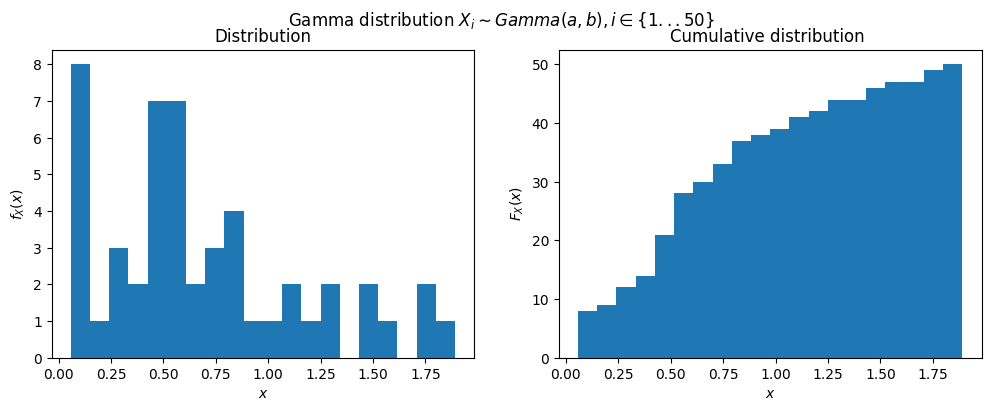

In [130]:
# Tamaño de la muestra
n = 50

# X1, X2, ..., Xn
x_sample = np.random.gamma(shape=a_real, scale=1 / b_real, size=n)
x_mean = x_sample.mean()
x_log_sum = np.log(x_sample).sum()

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plt.suptitle("Gamma distribution $X_i\sim Gamma(a, b), i \in\{1...50\}$")

axes[0].set_title("Distribution")
axes[0].hist(x_sample, bins=20)
axes[0].set_xlabel("$x$")
axes[0].set_ylabel("$f_X(x)$")

axes[1].set_title("Cumulative distribution ")
axes[1].hist(x_sample, bins=20, cumulative=True)
axes[1].set_xlabel("$x$")
axes[1].set_ylabel("$F_X(x)$")
plt.show()


#### 3. Obtener $\hat {a}$ estimador de a resolviendo el item d). (Utilice algún paquete)

Aplicando el método de máxima verosimilitud, se obtiene

$$l(a, b, X) = an\ln{b} - n \ln{\Gamma{(a)}} + (a-1)\sum_{i=1}^n \ln({X_i}) - bn\overline{X}\quad \dots (1)$$

De c) se obtiene $b = a/\overline{X}$

Reeemplazando en $(1)$ se obtiene

$$l(a, X) = an\ln{a} - an\ln{\overline{X}} - n \ln{\Gamma{(a)}} + (a-1)\sum_{i=1}^n \ln({X_i}) - na$$ 


In [110]:
def log_L(a, x_sample):
    n = x_sample.shape[0]
    x_mean = x_sample.mean()
    x_log_sum = np.log(x_sample).sum()
    return -(a * n * math.log(a) - a * n * math.log(x_mean) - n * math.log(math.gamma(a)) + (a - 1) * x_log_sum - n * a)


Se está utilizando la función `minimize` del paquete `scipy` con el método de Nelder-Mead el cual no requiere el uso de derivadas a diferencia de los métodos de Newton.

In [111]:
res = minimize(log_L, 0.5, x_sample, method='nelder-mead')
a_optimal = res.x[0]
print(f"Valor óptimo de a para n={n}\na = {a_optimal:1.6f}")


Valor óptimo de a para n=50
a = 2.135156


#### 4. Obtener $\hat b=a/\overline X$ estimador de $b$ con el item (c).

In [112]:
b_optimal = a_optimal/x_mean
print(f"Valor óptimo de b para n={n}\nb = {b_optimal:1.6f}")


Valor óptimo de b para n=50
b = 3.117559


#### 5. Compare los valores obtenidos con los valores reales de $a$ y $b$.

Debido a su naturaleza aleatoria, se realizará 10 simulaciones, luego se obtendrá la media de todos ellos para tener una mejor aproximación.   

In [113]:
print("10 simulaciones para obtener un mejor aproximado")

a_simulation = []

for i in range(10):
    x_sample = np.random.gamma(shape=a_real, scale=1 / b_real, size=n)
    res = minimize(log_L, 0.5, x_sample, method='nelder-mead')
    a_optimal = res.x[0]
    print(f"a[{i}] = {a_optimal}")
    a_simulation.append(a_optimal)

a_mean = np.mean(a_simulation)
b_mean = a_mean / x_mean

print(f"a_estimado = {a_mean:1.6f}, a_real = {a_real}, error = {abs(a_mean - a_real):1.6f}")
print(f"b_estimado = {b_mean:1.6f}, b_real = {b_real}, error = {abs(b_mean - b_real):1.6f}")


10 simulaciones para obtener un mejor aproximado
a[0] = 1.8270507812500028
a[1] = 1.5728515625000024
a[2] = 2.3171875000000037
a[3] = 2.2903320312500037
a[4] = 2.005371093750003
a[5] = 1.522851562500002
a[6] = 1.9613281250000032
a[7] = 1.9044921875000032
a[8] = 2.381640625000004
a[9] = 1.6801757812500027
a_estimado = 1.946328, a_real = 2, error = 0.053672
b_estimado = 2.841850, b_real = 3, error = 0.158150


### Realice lo anterior para $n = 100, n= 200, n = 300, n= 1000$.


Valores óptimos de a y b 
n =    50, a_estimado = 2.554004, error_a = 0.554004, b_estimado = 3.729122, error_b = 0.729122
n =   100, a_estimado = 1.981738, error_a = 0.018262, b_estimado = 2.893553, error_b = 0.106447
n =   200, a_estimado = 1.824219, error_a = 0.175781, b_estimado = 2.663557, error_b = 0.336443
n =   300, a_estimado = 1.842676, error_a = 0.157324, b_estimado = 2.690506, error_b = 0.309494
n =  1000, a_estimado = 2.020996, error_a = 0.020996, b_estimado = 2.950873, error_b = 0.049127


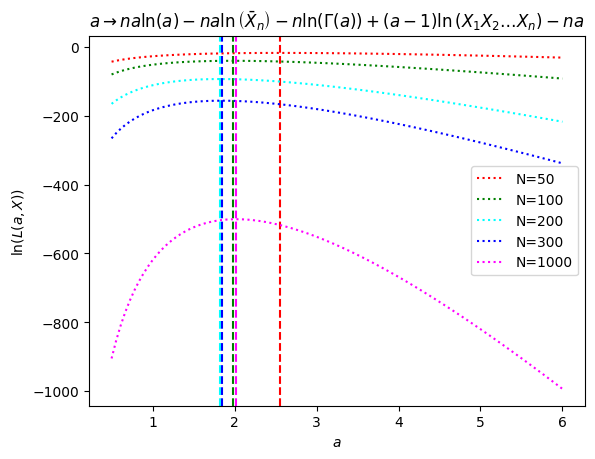

In [127]:
a_domain = np.linspace(0.5, 6, 100)
color = ['red', 'green', 'cyan', 'blue', 'magenta']
print("Valores óptimos de a y b ")

for i, n in enumerate([50, 100, 200, 300, 1000]):
    x_sample = np.random.gamma(shape=a_real, scale=1 / b_real, size=n)
    a_optimal = minimize(log_L, 0.5, x_sample, method='nelder-mead').x[0]
    b_optimal = a_optimal / x_mean
    print(f"n = {n:5d}, a_estimado = {a_optimal:1.6f}, error_a = {abs(a_optimal - a_real):1.6f}, b_estimado = {b_optimal:1.6f}, error_b = {abs(b_optimal - b_real):1.6f}")

    log_values = [-log_L(i, x_sample) for i in a_domain]
    # gráfico x_n
    plt.plot(a_domain, log_values, linestyle='dotted', label=f"N={n}", c=color[i])
    plt.axvline(a_optimal, linestyle='dashed', c=color[i])
    plt.legend()
plt.title(r"$a \rightarrow n a \ln (a)-n a \ln \left(\bar{X}_n\right)-n \ln (\Gamma(a))+(a-1) \ln \left(X_1 X_2 \ldots X_n\right)-n a$")
plt.xlabel("$a$")
plt.ylabel(r"$\ln(L(a, X))$")
plt.show()


**Conclusión**: se obtiene una mejor aproximación a medida que se aumenta el tamaño de la muestra.